# Exploring the Julia Set in Julia

[Julia sets](https://en.wikipedia.org/wiki/Julia_set) are beautiful mathematical objects, created by iterating functions over the complex numbers.

We won't go into the mathematics, but will see how to play with them in Julia.

The following Julia code takes as input two complex numbers, and calculates the "escape time" that we will use to plot Julia sets:

In [1]:
z = 1 + 2im

1 + 2im

In [2]:
typeof(z)

Complex{Int64}

In [3]:
abs2(z)

5

In [4]:
?abs2

search: abs2 sumabs2 sumabs2! abs abspath abstract AbstractRNG AbstractFloat



```
abs2(x)
```

Squared absolute value of `x`.


In [8]:
s = """
Hello Singapore.

This is Julia
"""

"Hello Singapore.\n\nThis is Julia\n"

In [9]:
print(s)

Hello Singapore.

This is Julia


In [6]:
const maxiter = 100

doc"""
Compute the *escape time* of the Julia set at $(z, c)$.  
"""
function julia(z, c)  # keyword argument
    
    for n in 1:maxiter
        abs2(z) > 4 && return n     # "short-circuiting" and = if-then
        z = z*z + c
    end
    
    return maxiter
end

julia

In [11]:
?julia

search: JULIA_HOME



**Welcome to Julia 0.5.0.** The full manual is available at

```
http://docs.julialang.org/
```

as well many great tutorials and learning resources:

```
http://julialang.org/learning/
```

For help on a specific function or macro, type `?` followed by its name, e.g. `?fft`, or `?@time`, and press enter.


In [12]:
?Main.julia

Compute the *escape time* of the Julia set at $(z, c)$.  


(Note that we can use Markdown syntax in the docstring, and LaTeX when using `doc"""..."""` instead of """...""".)

In [18]:
b = julia(-0.06 + 0.665im, -0.06 + 0.665im);

In [19]:
b

28

We can calculate a Julia set with fixed value of `c` using an array comprehension:

In [22]:
[(r, i) for r ∈ -1:0.5:1, i ∈ -1:0.5:1]

5×5 Array{Tuple{Float64,Float64},2}:
 (-1.0,-1.0)  (-1.0,-0.5)  (-1.0,0.0)  (-1.0,0.5)  (-1.0,1.0)
 (-0.5,-1.0)  (-0.5,-0.5)  (-0.5,0.0)  (-0.5,0.5)  (-0.5,1.0)
 (0.0,-1.0)   (0.0,-0.5)   (0.0,0.0)   (0.0,0.5)   (0.0,1.0) 
 (0.5,-1.0)   (0.5,-0.5)   (0.5,0.0)   (0.5,0.5)   (0.5,1.0) 
 (1.0,-1.0)   (1.0,-0.5)   (1.0,0.0)   (1.0,0.5)   (1.0,1.0) 

In [23]:
[r + i*im for r ∈ -1:0.5:1, i ∈ -1:0.5:1]

5×5 Array{Complex{Float64},2}:
 -1.0-1.0im  -1.0-0.5im  -1.0+0.0im  -1.0+0.5im  -1.0+1.0im
 -0.5-1.0im  -0.5-0.5im  -0.5+0.0im  -0.5+0.5im  -0.5+1.0im
  0.0-1.0im   0.0-0.5im   0.0+0.0im   0.0+0.5im   0.0+1.0im
  0.5-1.0im   0.5-0.5im   0.5+0.0im   0.5+0.5im   0.5+1.0im
  1.0-1.0im   1.0-0.5im   1.0+0.0im   1.0+0.5im   1.0+1.0im

In [27]:
data = [julia(r + i*im, -0.06 + 0.665im) for r in -1:0.002:1, i in -0.5:0.002:0.5]

1001×501 Array{Int64,2}:
  3   3   3   3   3    3    3    3    3  …   72   38   36  36  35  34  34  34
  3   3   3   3   3    3    3    3    3     100   39   37  36  35  34  34  33
  3   3   3   3   3    3    3    3    3      77  100  100  37  34  34  33  33
  3   3   3   3   3    3    3    3    3      57  100   46  35  34  33  33  33
  3   3   3   3   3    3    3    3    3      62   68   37  35  33  33  33  32
  3   3   3   3   3    3    3    3    3  …   90  100   36  34  33  33  32  32
  3   3   3   3   3    3    3    3    3     100   45   74  35  33  32  32  32
  3   3   3   3   3    3    3    3    3      57   92   55  59  32  32  31  31
  3   3   3   3   3    3    3    3    3      62   43   36  32  31  31  31  31
  3   3   3   3   3    3    3    3    3      68   34   32  31  30  30  30  31
  3   3   3   3   3    3    3    3    3  …   67   36   31  30  30  30  30  30
  3   3   3   3   3    3    3    3    3      65   59   30  29  29  29  30  30
  3   3   3   3   3    3    3    3    3

## Adding some colour

In [ ]:
# Install required packages:
# Pkg.add("Images")
# Pkg.add("ImageMagick")
# Pkg.add("QuartzImageIO")

In [26]:
using Colors, Images, ImageMagick

In [ ]:
const cmap = colormap("RdBu", 100)

In [30]:
maximum(data)

100

In [32]:
max(1, 2, 17, 3)

17

In [31]:
max(data)

LoadError: MethodError: no method matching max(::Array{Int64,2})[0m
Closest candidates are:
  max{T1<:Real,T2<:Real}(::AbstractArray{T1<:Real,N}, [1m[31m::T2<:Real[0m) at operators.jl:563
  max{T1<:Real,T2<:Real}(::AbstractArray{T1<:Real,N}, [1m[31m::AbstractArray{T2<:Real,N}[0m) at operators.jl:564
  max(::Any, [1m[31m::Any[0m) at operators.jl:87
  ...[0m

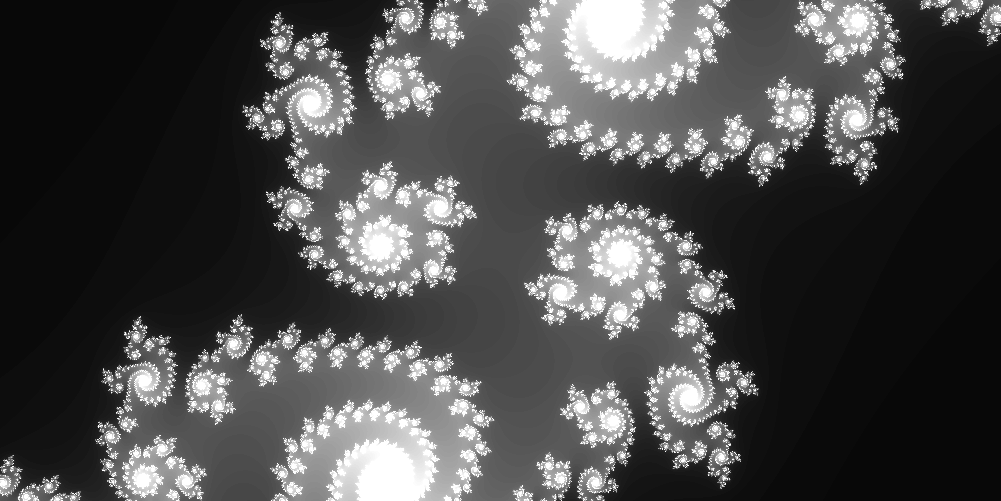

In [33]:
grayim(data / maximum(data))

In [34]:
?colormap

search: colormap colormatch cie_color_match weighted_color_mean colorim colordim



```
colormap(cname, [N; mid, logscale, kvs...])
```

Returns a predefined sequential or diverging colormap computed using the algorithm by Wijffelaars, M., et al. (2008).  Sequential colormaps `cname` choices are `Blues`, `Greens`, `Grays`, `Oranges`, `Purples`, and `Reds`.  Diverging colormap choices are `RdBu`.  Optionally, you can specify the number of colors `N` (default 100). Keyword arguments include the position of the middle point `mid` (default 0.5) and the possibility to switch to log scaling with `logscale` (default false).


In [ ]:
# const cmap = convert(Vector{RGB{U8}}, colormap("RdBu", 100))

In [39]:
cmap = colormap("RdBu", maxiter)  

In [40]:
cmap[1]

In [41]:
typeof(cmap)

Array{ColorTypes.RGB{Float64},1}

In [42]:
typeof(cmap[1])

ColorTypes.RGB{Float64}

In [43]:
show(cmap[1])

RGB{Float64}(0.37863023680922786,0.005616712554454685,0.0063827234220941165)

In [ ]:
julia(-1.5+0.05im, -0.07+0.66im)

In [45]:
domain = -1.5 : 0.005 : 1.5

data = [julia(r + i*im, -0.07 + 0.66im) for r in domain, i in domain];

In [46]:
domain

-1.5:0.005:1.5

In [47]:
typeof(domain)

FloatRange{Float64}

In [49]:
data[100:200, 100:200];

In [51]:
cmap[63]

In [54]:
data

601×601 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  

In [55]:
[ i*2 for i in data ]  # i runs over all possible values inside the matrix data
# the result will have the same *shape* (size) as data

601×601 Array{Int64,2}:
 2  2  2  2  2  2  2  2  2  2  2  2  2  …  2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2     2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2     2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2     2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2     2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2  …  2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2     2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2     2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2     2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2     2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2  …  2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2     2  2  2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2  2  2  2  

In [56]:
[ i^2 for i in data ]

601×601 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  

In [58]:
pixels = [ cmap[i] for i in data ];

In [59]:
typeof(pixels)

Array{ColorTypes.RGB{Float64},2}

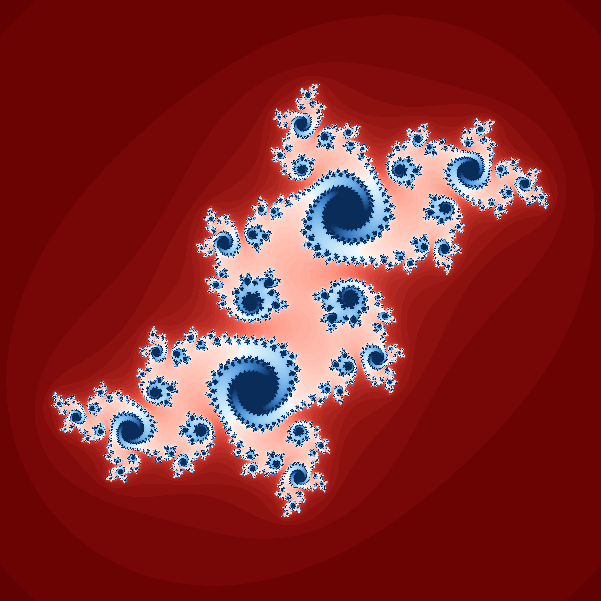

In [60]:
pixels

**Exercise**: In a new notebook, do not load `Images` and repeat the calculation. It will not be displayed as an image.

In [ ]:
pixels = [ cmap[pixel_value] for pixel_value in data ]
# array comprehension where `data` is itself a matrix!

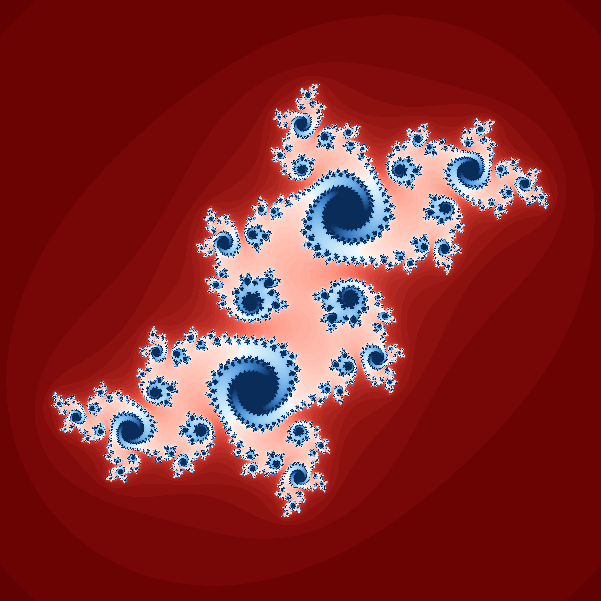

In [61]:
cmap[data]  # index into the cmap vector with an entire matrix of numbers

In [ ]:
typeof(ans)

In [ ]:
img = Image(pixels)

In [ ]:
typeof(img)

In [ ]:
save("Julia_pixels", pixels)

In [ ]:
save("Julia_set.png", img)

The following is more efficient, at least in memory, since it does not create the intermediate `data` array:

In [ ]:
domain = -1.5:0.005:1.5

pixels = [ cmap[ julia(r + i*im, r + i*im) ] for r in domain-0.5, i in domain]

Image(pixels)

In [ ]:
using Interact

In [ ]:
@manipulate for r′ = -0.1:0.01:0.1, i′ = 0.65:0.01:0.85
    Image(cmap[[julia(r + i*im, r′ + i′*im) for r=-1.5:.005:1.5, i=-1:.005:1]])
end

In [ ]:
# let R = -1.5:.005:1.5, I = -1:.005:1
#     data = Array{RGB{U8}}(length(R), length(I))
#     img = Image(data)
    
#     @manipulate for r′ = -0.1:0.01:0.1, i′ = 0.65:0.01:0.85
#         for (j,r) in enumerate(R), (k,i) in enumerate(I)
#             data[j,k] = cmap[julia(r + i*im, r′ + i′*im)]
#         end
        
#         img
#     end
# end

## Let's animate!

In [ ]:
@manipulate for r′ = -0.1:0.01:0.1, i′ = map(_->0.65+0.5*sin(time())*0.25, fps(10))
    Image([cmap[julia(r + i*im, r′ + i′*im)] for r=-1.5:.005:1.5, i=-1:.005:1])
    end